<div style="margin-bottom: 120px;">
    <div style="float:left;">
        <br/>
        <img src="img/udc.png" width="300"/>
    </div>
</div>

<h1 style="color: #d60e8c; text-align:center;">Clasificación no supervisada (K-Means)</h1>

<h1>Contenidos</h1>

<div class="alert alert-block alert-info" 
     style="margin-top: 20px; padding-top:0px; padding-bottom:20px;border: 1px solid #d60e8c; border-radius: 20px; background:transparent;">
    <ul>
        <li><a href="#intro">Introducción</a></li>
        <li><a href="#customer_segmentation_K_means">Segmentación de clientes utilizando K-Means</a></li>
            <ol>
                <li><a href="#read-dataset">Lectura del conjunto de datos</a></li>
                <li><a href="#modeling">Creación del modelo</a></li>
                <li><a href="#insights">Resultados</a></li>
                <li><a href="#exercise">Ejercicios</a></li>
            </ol>
    </ul>
</div>


<a name="intro"></a>
<h1 style="color: #d60e8c;">Introducción</h1>
<hr style="border: 0.5px solid #d60e8c;">

En esta práctica, utilizaremos clasificación no supervisada mediante **K-means**, para la clasificación de clientes a partir de un conjunto de datos históricos.


## Importamos las librerías

Comenzamos importando las librerías que utilizaremos:

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

%matplotlib inline

<a name="customer_segmentation_K_means"></a>
<h1 style="color: #d60e8c;">Segmentación de clientes utilizando K-Means</h1>
<hr style="border: 0.5px solid #d60e8c;">

Imagina que tienes un conjunto de datos de clientes, y necesitas aplicar la segmentación de clientes a partir de esos datos.  

La segmentación de clientes es la práctica de dividir una base de clientes en grupos de individuos que tienen características similares. Es una estrategia significativa, ya que una empresa puede dirigirse a estos grupos específicos de clientes y asignar eficazmente los recursos de marketing. Por ejemplo, un grupo puede contener clientes de alta ganancia y bajo riesgo, es decir, con mayor probabilidad de comprar productos o suscribirse a un servicio. Una tarea empresarial consiste en retener a esos clientes. Otro grupo, podría incluir clientes de poca ganancia. Y así sucesivamente.

<a name="read-dataset"></a>
<h2 style="color: #d60e8c;">Lectura del conjunto de datos</h2>
<hr style="border: 0.5px dashed #d60e8c;">

El conjunto de datos que utilizaremos contiene la siguiente información de clientes:

- __Customer Id__: identificador del cliente
- __Age__: edad
- __Edu__: nivel deducativo, desde 1 hasta 5, donde 1 hasta 5, siendo 5 el nivel más alto.
- __Year Employed__: nº de años que ha estado contratado.
- __Income__: ingresos en miles de euros.
- __Card Debt__: deuda en trajetas de créditos (en miles de euros).
- __Other Debt__: otras deudas (en miles de euros).
- __DebtIncomeRatio__: ratio deuda/ingresos

Utilizamos la librería <code>pandas</code> para leer los datos históricos de los clientes a partir del archivo "cust_segmentation.csv" que se encuentra en la misma carpeta que este notebook y lo guardamos en un <code>DataFrame</code>. A continuación, mostramos las primeras filas con la función <code>head</code>:

In [3]:
df = pd.read_csv("Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,6.3
1,2,47,1,26,100,4.582,8.218,12.8
2,3,33,2,10,57,6.111,5.802,20.9
3,4,29,2,4,19,0.681,0.516,6.3
4,5,47,1,31,253,9.308,8.908,7.2


<a name="visualization_analysis"></a>
<h1 style="color: #d60e8c;"> Visualización y análisis de los datos</h1>
<hr style="border: 0.5px solid #d60e8c;">

#### Veamos cuantos elementos tiene nuestro conjunto de datos

In [4]:
df.shape

(850, 8)

#### Veamos sus atributos

In [5]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'DebtIncomeRatio'],
      dtype='object')

<a name="modeling"></a>
<h2 style="color: #d60e8c;">Creación del modelo</h2>
<hr style="border: 0.5px dashed #d60e8c;">

Ahora, vamos a aplicar el algoritmo **K-means** al conjunto de datos. Para ello, utilizaremos la función de scikit-learn <code>Kmeans</code> (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans">documentación de la función</a>).


Comenzamos creando el array de entradas del algotirmo, seleccionando las columnas que aportan información relevante para la clasificación (no incluiremos la columna "CustomerId" porque no aporta infromación relevante). 

In [6]:
feature_df = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio']]

X = np.asarray(feature_df)

Creamos ahora el modelo K-means con tres clústers. Vamos a utilizar el método <code>fit_predict</code> que, además de entrenar el algoritmo, realiza la clasificación en los tres clústeres y devuelve la lista de etiquetas asignadas.

In [7]:
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
labels = k_means.fit_predict(X)  # almacenamos las etiquetas en la variable labels para crear con esos valores una nueva columna en el dataframe.

/usr/local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

<a name="insights"></a>
<h2 style="color: #d60e8c;">Resultados</h2>
<hr style="border: 0.5px dashed #d60e8c;">

Asignamos las etiquetas obtenidas con K-means a cada fila del dataframe.

In [8]:
#Añade una nueva columna al DataFrame y le asigna las etiquetas
df["Cluster"] = labels 

# Muestra las primeras filas, vemos que tenemos una nueva columna con la clasificación
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,Cluster
0,1,41,2,6,19,0.124,1.073,6.3,0
1,2,47,1,26,100,4.582,8.218,12.8,2
2,3,33,2,10,57,6.111,5.802,20.9,0
3,4,29,2,4,19,0.681,0.516,6.3,0
4,5,47,1,31,253,9.308,8.908,7.2,1


Podemos obtener las coordenadas de los centroides de los clusters, con el atributo <code>cluster_centers_</code>:

In [9]:
k_means.cluster_centers_

array([[ 32.96456086,   1.61479199,   6.37442219,  31.16486903,
          1.03254083,   2.10413251,  10.09476117],
       [ 45.38888889,   2.66666667,  19.55555556, 227.16666667,
          5.67844444,  10.90716667,   7.32222222],
       [ 41.33333333,   1.95628415,  15.2568306 ,  83.92896175,
          3.10363934,   5.76527869,  10.72459016]])

Si calculamos la media de los atributos en cada clase, podemos ver que se corresponde con las coordenadas de los centroides. Para ello, agrupamos el dataframe por los distintos valores del atributo "Cluster", es decir, las etiquetas de cada clase de la clasificación obtenida con K-means:

In [10]:
means = df.groupby('Cluster').mean() 
means[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt','Other Debt', 'DebtIncomeRatio']]

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Cluster,,,,,,,
0,32.964561,1.614792,6.374422,31.164869,1.032541,2.104133,10.094761
1,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,7.322222
2,41.333333,1.956284,15.256831,83.928962,3.103639,5.765279,10.724590


K-means ha divido a los clientes en tres grupos mutuamente exclusivos. Los clientes de cada grupo son similares entre sí, con lo que, podemos crear un perfil para cada grupo, considerando las características comunes de cada clúster.

<h3>Representación gráfica</h3>
Podemos ver gráficamente la distribución de los clientes en función de las etiquetas asignadas, en dos dimensiones, a partir de dos atributos, edad e ingresos, por ejemplo (recordemos que la visualización es orientativa porque el conjunto de datos tiene más de 2 atributos). 

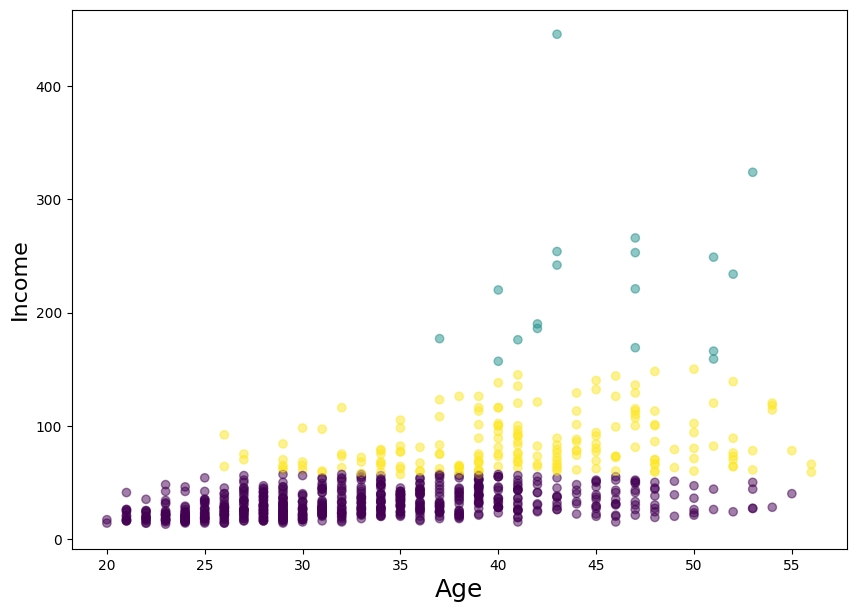

In [11]:
plt.figure(figsize=(10,7))
ax = plt.scatter(X[:,0], X[:, 3], c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

Podríamos visualizarlo también en tres dimensiones, con tres atributos:

In [17]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels)

<Figure size 800x600 with 0 Axes>

<a name="exercise"></a>
<a name="customer_segmentation_K_means"></a>
<h1 style="color: #d60e8c;">Ejercicios</h1>
<hr style="border: 0.5px solid #d60e8c;">

<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white; margin-top:20px;">
      <h2>EJERCICIO 1</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
       <li>Realiza ahora una segmentación de clientes con este otro conjunto de datos: <b>teleCust1000t.csv</b></li>
       <li>Desarrolla todo el proceso:
           <ul>
               <li>Lectura del conjunto de datos.</li>
               <li>Creación del modelo.</li>
               <li>Visualización de resultados en 2D (opcional en 3D).</li>
           </ul>
       </li>
    </ul>
</div>

In [13]:
# Escribe aquí tu código (puedes añadir las celdas que necesites para realizar el ejercicio)





<div class="alert alert-block alert-info" 
     style="border: 0px solid #d60e8c; border-radius: 10px; background:#d60e8c; color: white; margin-top:20px;">
      <h2>EJERCICIO 2</h2>
    <hr style="border: 0.5px solid #ffffff;">
    <ul style="margin-bottom: 20px;">
       <li>Crea ahora un script python con Visual Studio Code con el código del ejercicio 1. El objetivo de este ejercicio es que familiarizarse con la creación los modelos de esta forma, ya que las prácticas entregables se realizarán así.<br><br>Ten en cuenta:
           <ul>
               <li>Incluye los imports al principio del script (excepto <code>%matplotlib inline</code>), es decir incluye:
                   <pre style="background:#d60e8c;color: white;">   
                    import pandas as pd
                    import numpy as np 
                    import matplotlib.pyplot as plt 
                    from sklearn.cluster import KMeans 
                   </pre>
               </li>
               <li>El archivo "teleCust1000t.csv" debe estar en la misma carpeta que el script o en caso contrario, debes indicar la ruta al archivo en la la lectura del mismo con <code>read_csv</code>.</li>
               <li>Cuando ejecutes el script, al generar la gráfica se abrirá una ventana como la siguiente con la gráfica. Desde esta ventana, puedes guardarla como una imagen para utilizar en informes. Esto será necesario para la realización de las prácticas. También puedes utilizar la función <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html#matplotlib.pyplot.savefig"><code>savefig</code></a> en lugar de <code>show</code> para guardar la imagen en un archivo en lugar de mostrarla por pantalla durante la ejecución. Por ejemplo, si quieres guardarla en un archivo llamado "grafica.png" sería <code>plt.savefig("grafica.png")</code><br>
                   <center><img src="img/captura_ventana_matplotlib.png" style="max-width:600px;" /></center>
               </li>
           </ul>           
       </li>
    </ul>
</div>

<br/><br/>
<hr style="border: 0.5px solid #d60e8c;">
<div style="text-align:right;">
MASTER UNIVERSITARIO EN INGENIERÍA INDUSTRIAL
</div>